In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
import time
import math

### Q1 b) the Van Der Pol oscillator problem:
$y_1' = y_2$, \
$y_2' = \mu ((1-y_1^2)y_2)-y_1$

In [3]:
def func(t,y, mu):
    # The right-hand side for the van der pol oscillator problem

    dy = np.zeros((2,))
    dy[0] = y[1]
    dy[1] = mu * ((1 - y[0]* y[0])* y[1]) - y[0]
    return dy

# initial condition for the solution
y0 = np.array([2,0])


# parameters
tmax = 1000

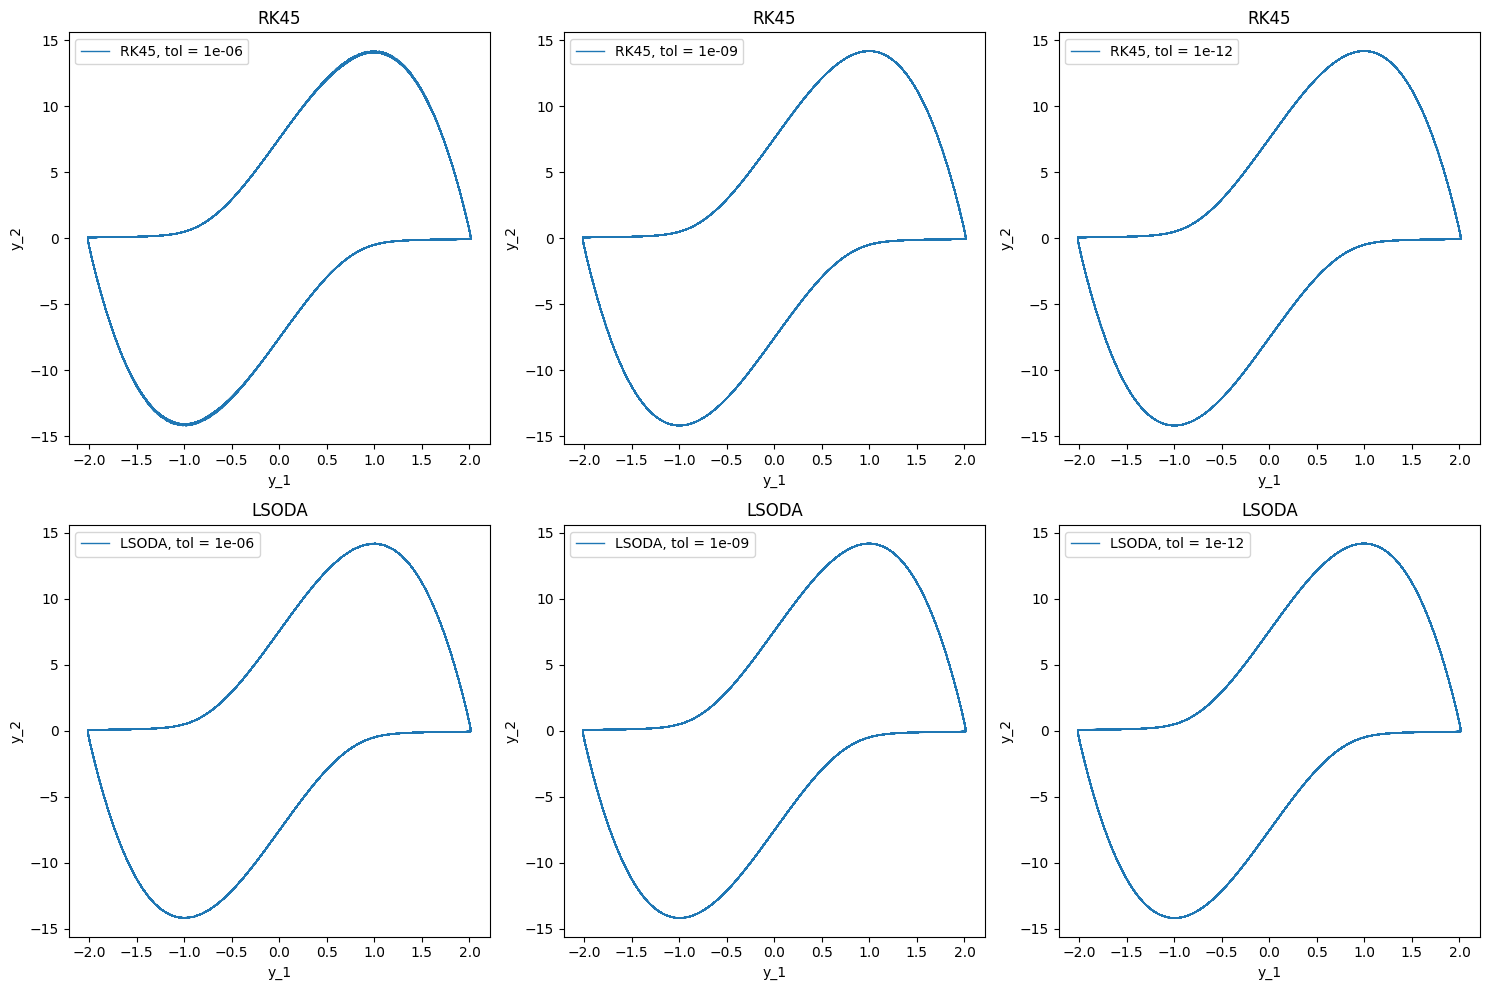

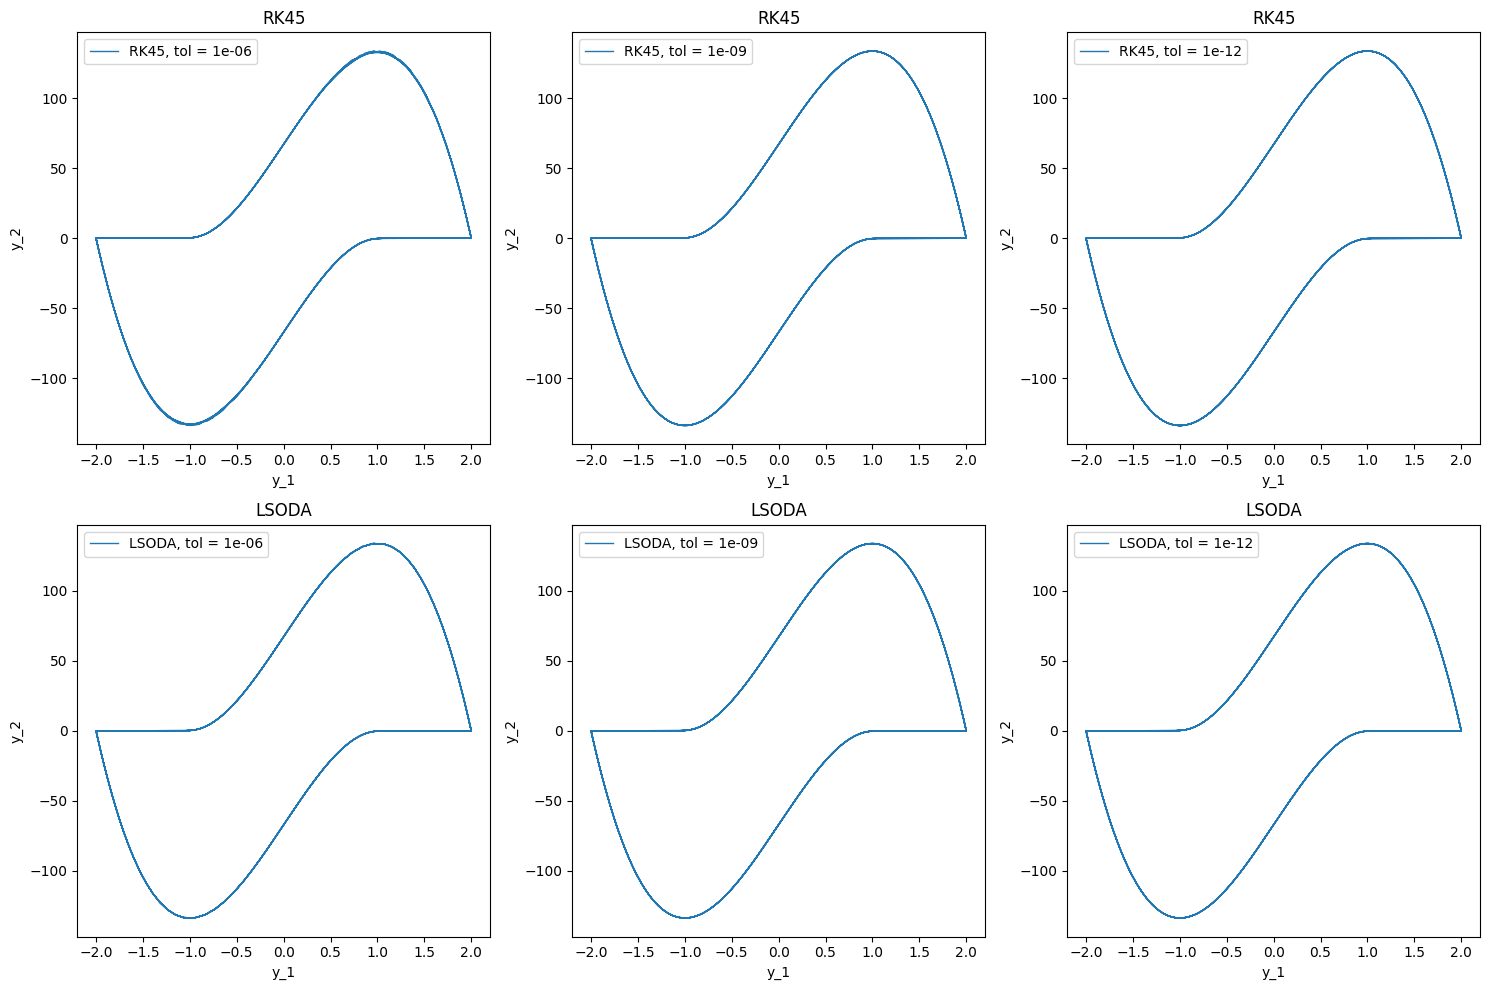

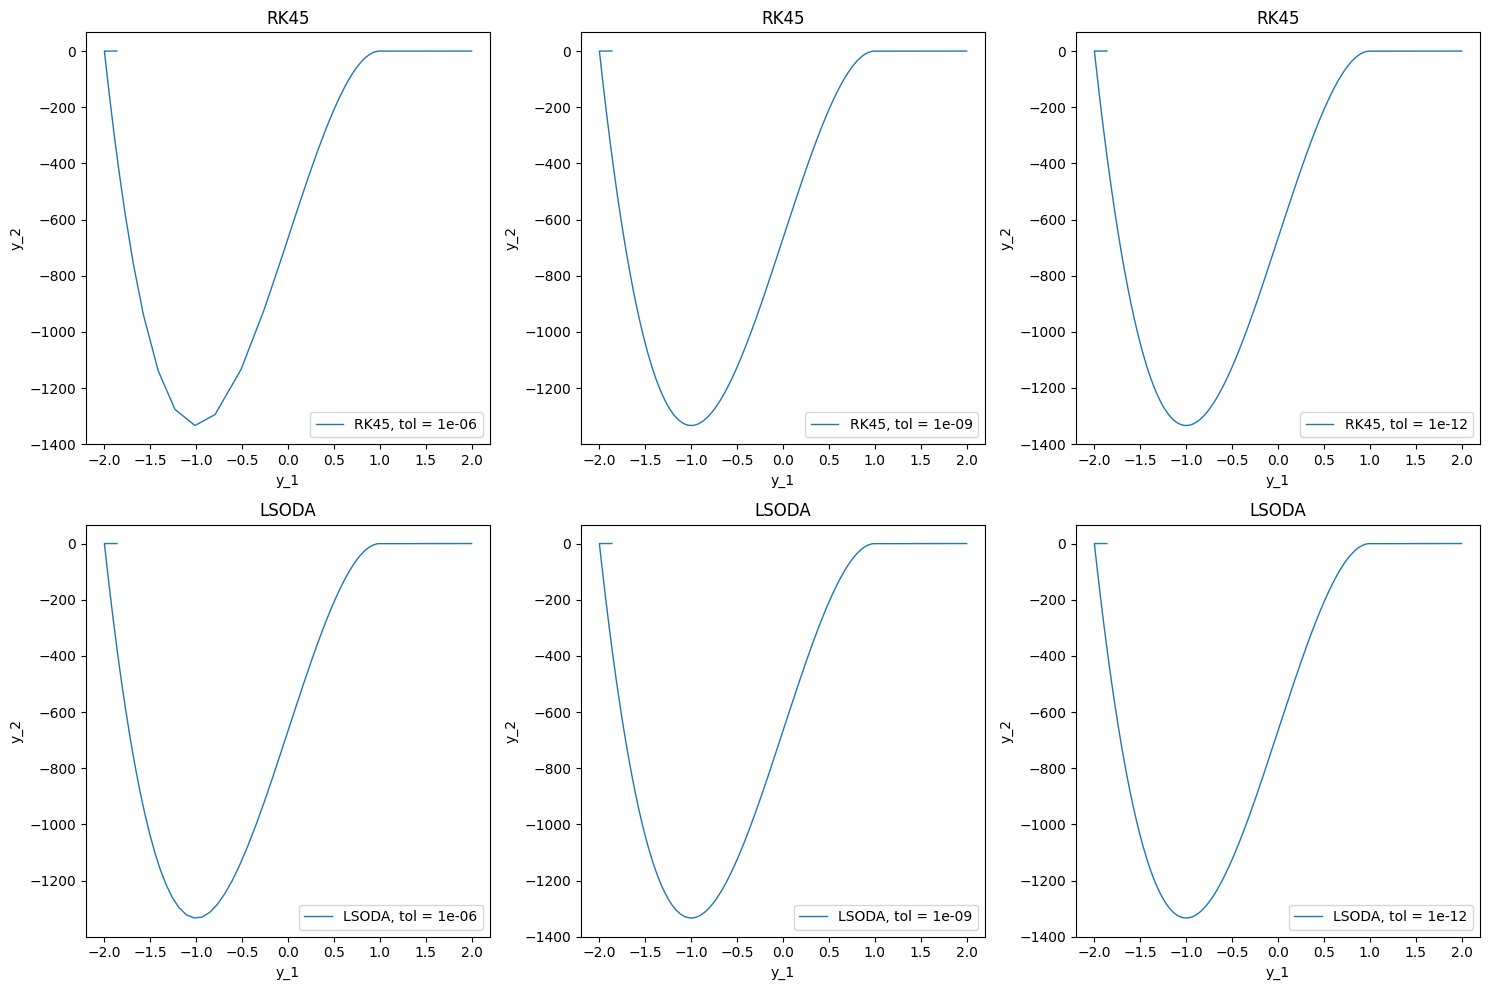

In [4]:
# 3 pics for mu = 10, 100, 1000, each pic which 6 subslots of 3 different tols and 2 different methods
mu_values = [10, 100, 1000]
errors = [1e-6, 1e-9, 1e-12]



for mu_index, mu in enumerate(mu_values):
    fig, axes = plt.subplots(2, 3, figsize=(15,10))
    for error_index, error in enumerate(errors):

        #RK4 
        sol_rk45 = sci.solve_ivp(func, [0, tmax], y0, method='RK45', atol=error, rtol=error, args=(mu,))
        axes[0, error_index].plot(sol_rk45.y[0, :], sol_rk45.y[1, :], linewidth=1, label=f'RK45, tol = {error}')
        axes[0, error_index].set_title(f'RK45')
        axes[0, error_index].set_xlabel('y_1')
        axes[0, error_index].set_ylabel('y_2')
        axes[0, error_index].legend()

        #LSODA
        sol_lsoda = sci.solve_ivp(func, [0, tmax], y0, method='LSODA', atol=error, rtol=error, args=(mu,))
        axes[1, error_index].plot(sol_lsoda.y[0, :], sol_lsoda.y[1, :], linewidth=1, label=f'LSODA, tol = {error}')
        axes[1, error_index].set_title(f'LSODA')
        axes[1, error_index].set_xlabel('y_1')
        axes[1, error_index].set_ylabel('y_2')
        axes[1, error_index].legend()

    plt.tight_layout()
    plt.show()



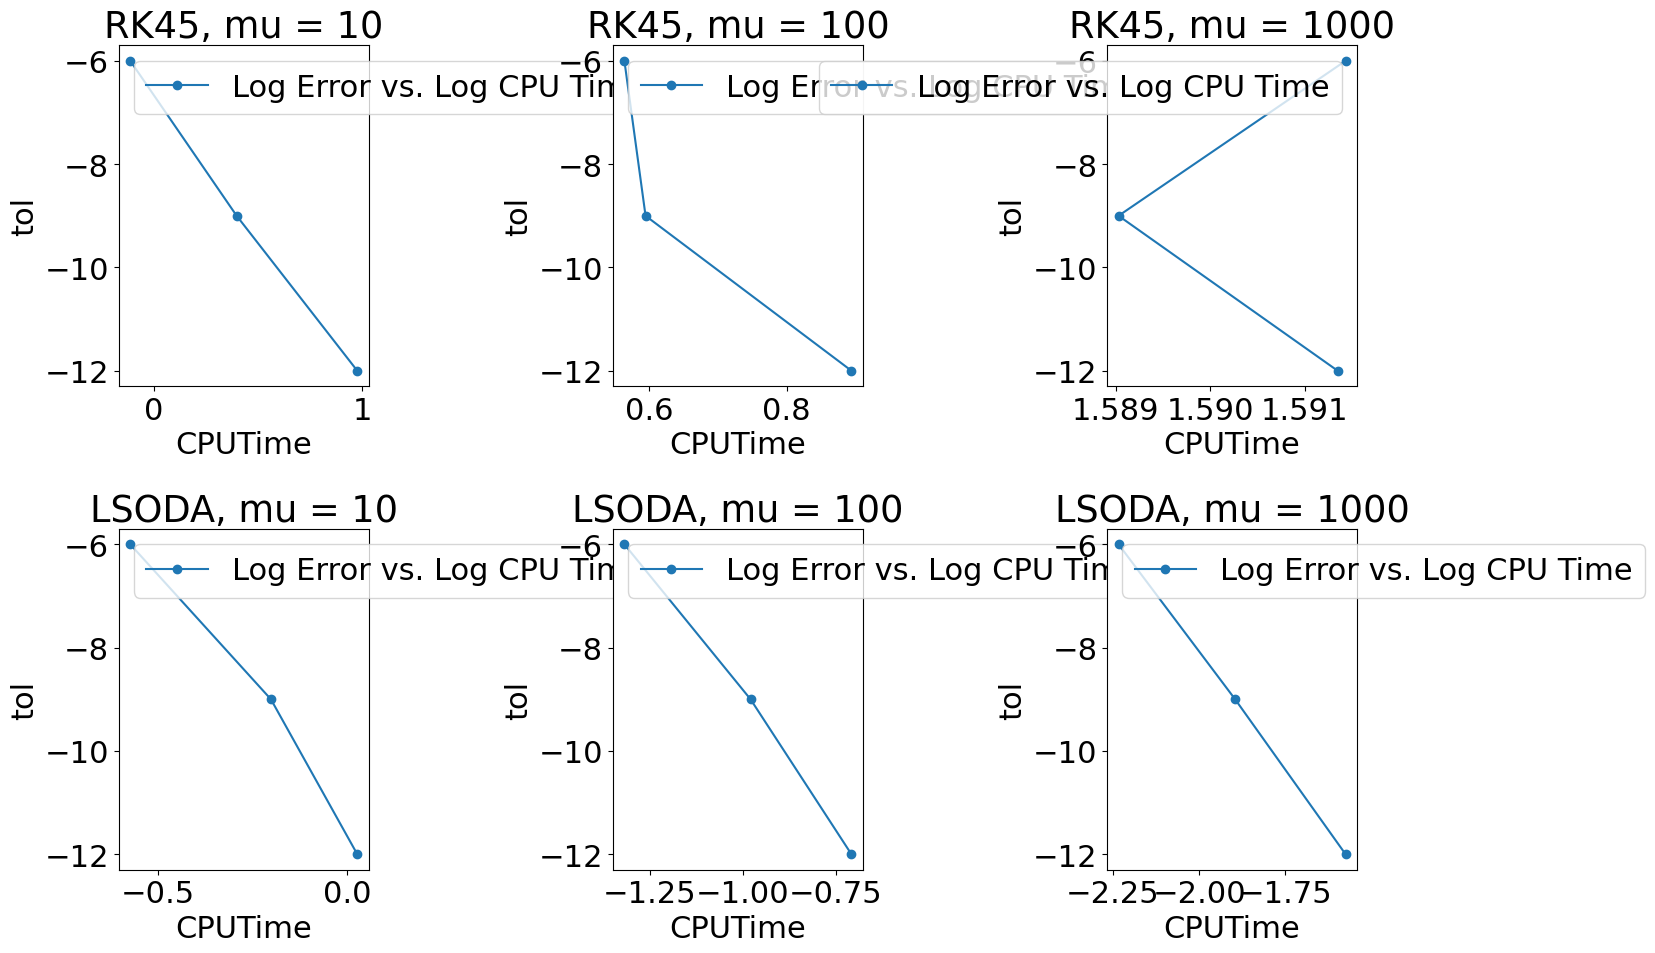

In [56]:
# measure the CPUtime and log tol
mu_values = [10, 100, 1000]
errors = [1e-6, 1e-9, 1e-12]
# cpu_times = []

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for mu_index, mu in enumerate(mu_values):
    cpu_times_RK = []
    cpu_times_LSODA =[]
    for error_index, error in enumerate(errors):

        start_time_RK = time.process_time()
        sol_RK = sci.solve_ivp(func,[0,tmax],y0,method = 'RK45',atol = error, rtol=error, args=(mu,))
        end_time_RK = time.process_time()
        cpu_time_RK = end_time_RK - start_time_RK
        cpu_times_RK.append(cpu_time_RK)

        start_time_LSODA = time.process_time()
        sol_LSODA = sci.solve_ivp(func,[0,tmax],y0,method = 'LSODA',atol = error, rtol=error, args=(mu,))
        end_time_LSODA = time.process_time()
        cpu_time_LSODA = end_time_LSODA - start_time_LSODA
        cpu_times_LSODA.append(cpu_time_LSODA)

    axes[0, mu_index].plot(np.log10(cpu_times_RK), np.log10(errors), 'o-', label='Log Error vs. Log CPU Time')
    axes[0, mu_index].set_title(f'RK45, mu = {mu}')
    axes[0, mu_index].set_xlabel('CPUTime')
    axes[0, mu_index].set_ylabel('tol')
    axes[0, mu_index].legend()
    axes[1, mu_index].plot(np.log10(cpu_times_LSODA), np.log10(errors), 'o-', label='Log Error vs. Log CPU Time')
    axes[1, mu_index].set_title(f'LSODA, mu = {mu}')
    axes[1, mu_index].set_xlabel('CPUTime')
    axes[1, mu_index].set_ylabel('tol')
    axes[1, mu_index].legend()   

plt.tight_layout()
plt.show()



### Q1 c) Arenstorf prob


In [22]:
def func(t,y):
    mu = 0.012277471
    # The right-hand side for the arenstorf
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    r_1 = math.sqrt((y[0] + mu)**2 + y[1]**2)
    r_2 = math.sqrt((y[0] -1 + mu)**2 + y[1]**2)
    dy[2] =y[0] + 2*y[3] - (1 - mu)*(y[0] + mu)/r_1**3 - mu*(y[0] - 1 + mu)/r_2**3
    dy[3] = y[1] - 2*y[2] -(1 - mu)*y[1]/r_1**3 - mu*y[1]/r_2**3
    return dy

# initial condition for the solution
y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])



CPU time = 0.32271700000001147 for solver RK45 amd tmax = 100
CPU time = 0.06066699999999514 for solver RK45 amd tmax = 17.065216560157964
CPU time = 0.11443200000000786 for solver DOP853 amd tmax = 100
CPU time = 0.01935100000000034 for solver DOP853 amd tmax = 17.065216560157964
CPU time = 5.535723000000004 for solver Radau amd tmax = 100
CPU time = 0.8604340000000121 for solver Radau amd tmax = 17.065216560157964


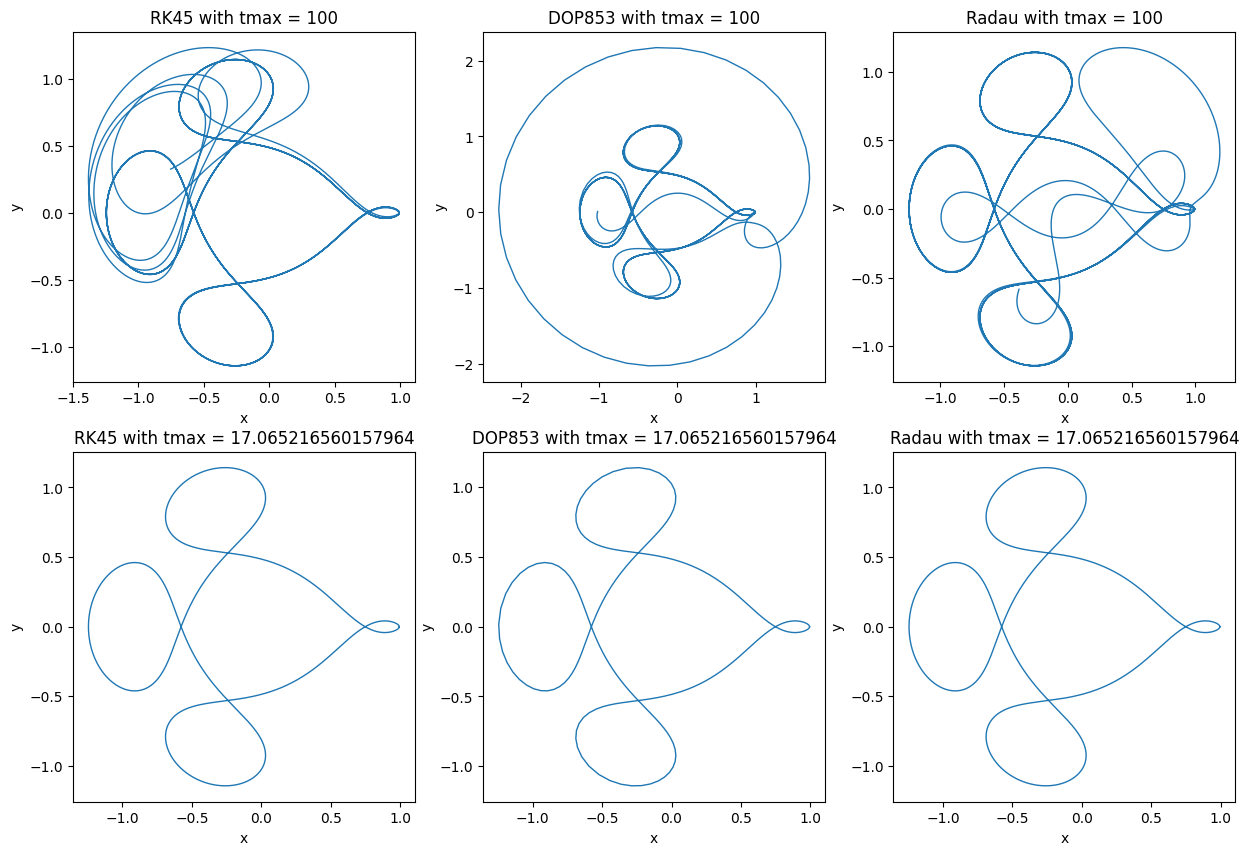

In [28]:
plt.rcParams.update({'font.size': 10}) # set globally the font size
fig, ax = plt.subplots(2,3, figsize=(15,10))

solvers = ['RK45', 'DOP853', 'Radau']
Tmaxs = [100, 17.0652165601579625588917206249]

for solver_ind, solver in enumerate(solvers):
    for Tmax_ind, Tmax in enumerate(Tmaxs):

        #Report the CPUtime
        start_time = time.process_time()
        sol = sci.solve_ivp(func, [0, Tmax], y0, method = solver, atol = 1e-12, rtol = 1e-12)
        end_time = time.process_time()
        CPU_time = end_time - start_time
        print(f'CPU time = {CPU_time} for solver {solver} amd tmax = {Tmax}')

        #draw pics
        ysol = sol.y
        ax[Tmax_ind, solver_ind].plot(ysol[0,:],ysol[1,:],linewidth=1)   
        ax[Tmax_ind, solver_ind].set_title(f'{solver} with tmax = {Tmax}')
        ax[Tmax_ind, solver_ind].set_xlabel("x")
        ax[Tmax_ind, solver_ind].set_ylabel("y")


plt.show()



### Q2 regions of the absolute stability for:
1. Forward Euler       
2. Midpoint Rule with Euler Predictor   \
3. Kutta's method(3 stage, 3rd order)   \
4. RK4                                  \
5. DOPRI5(4)                            



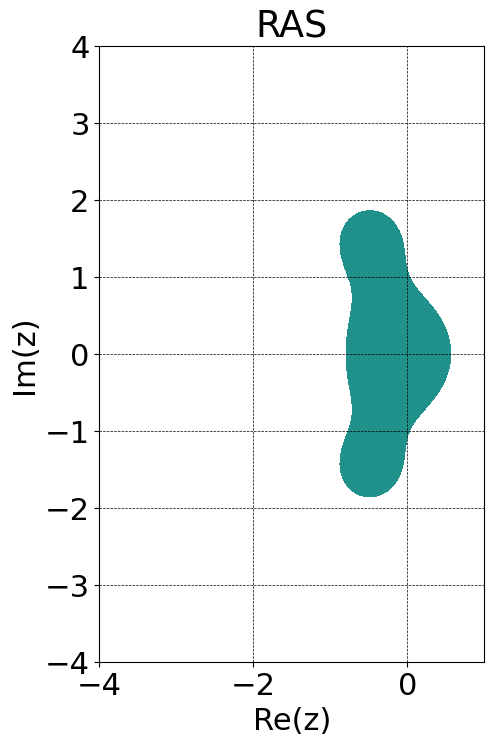

In [3]:
nx = 100
ny = 160
x = np.linspace(-4,1,nx)
y = np.linspace(-4,4,ny)
xg,yg = np.meshgrid(x,y)



z = xg + 1j*yg 

# forward euler
f_1 = 1 + z
absf_1 = (f_1.real)**2 + (f_1.imag)**2

# Midpoint Rule with Euler Predictor 
f_2 = 1 + z + 0.5*z*z
absf_2 = (f_2.real)**2 + (f_2.imag)**2

# Kutta's method (3,3)
f_3 = 4/3*z + 0.5*z**2 + 0.5*z**3
absf_3 = (f_3.real)**2 + (f_3.imag)**2

# pics
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
# plt.contourf(xg,yg,absf_1,np.arange(2))  
# plt.contourf(xg,yg,absf_2,np.arange(2))  
plt.contourf(xg,yg,absf_3,np.arange(2))  
plt.title("RAS")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
ax.set_aspect(1)
plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.savefig('RK2_RAS.pdf')